<a href="https://colab.research.google.com/github/ErikGumilar/Causal-Analysis-and-Inference/blob/main/Causal_Inference_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and Import Package**

In [1]:
!pip install econml

     |████████████████████████████████| 3.3 MB 4.3 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 356 kB 43.9 MB/s 
     |████████████████████████████████| 123 kB 61.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491673 sha256=61dee72d61f5a8a28cc2f80648256072669cb357a6c2105a483eaedaf2834d86
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [9]:
!pip install psmpy
!pip install pycausalimpact

     |████████████████████████████████| 9.8 MB 6.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [33]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

# statsmodels for linear/logistic regression and Granger causality test
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# psmpy for propensity score modeling and plotting
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

# causalimpact for intervention analysis
from causalimpact import CausalImpact

# Study Case

![](https://and-lc.com/wp-content/uploads/2019/06/1qw.png)

In 2018 there is a journal about "[Effectiveness of a Growth Mindset in Education](https://nwcommons.nwciowa.edu/cgi/viewcontent.cgi?article=1090&context=education_masters)" conducted by Sarah Zintz. A journal that explores the literature review on the influence of "Growth Mindset" on education. Many literature reviews say that the Growth Mindset will affect a person's level of learning. As example, Dweck (2006) said, suggests that a growth mindset evolves from an attitude of hard work, learning, training, and perseverance. Growth mindset is learning, growing, and hard work despite setbacks. Students with a growth mindset view failures as potential chances for instructive feedback and are more likely to learn from mistakes. Research by Claro and Paunesku (2014) revealed that students who demonstrate a growth mindset performs betters than students with a fixed mindset, significantly outscoring them in the areas of math and literacy. Students are more likely to recognize the importance of effort and academic success. Students will seek out challenging academic tasks to enhance learning and value critical feedback.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR54RjJNN72_yNkBi0m1KLizSOzbvAbTWMpYw&usqp=CAU)

Based on that explaination from Mrs. Zintz, it is true that Growth Mindset involve on Education and Learning level of student? Let's check out.

## **Read the Data**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv", sep=',')

In [3]:
df

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1,0,0.808867,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10387,1,0,-0.156063,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10388,1,0,0.370820,2,15,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10389,1,0,-0.396297,5,4,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702


## **Data Descriptions**

*   `schoolid`: identifier of the student’s school
*   `success_expect`: self-reported expectations for success in the future, a proxy for prior achievement, measured prior to random assignment
*   `ethnicity`: categorical variable for student race/ethnicity
*   `gender`: categorical variable for student identified gender
*   `frst_in_family`: categorical variable for student first-generation status, i.e. first in family to go to college
*   `school_urbanicity`: school-level categorical variable for urbanicity of the school, i.e. rural, suburban, etc
*   `school_mindset`: school-level mean of students’ fixed mindsets, reported prior to random assignment, standardized
*   `school_achievement`: school achievement level, as measured by test scores and college preparation for the previous 4 cohorts of students, standardized
*   `school_ethnic_minority`: school racial/ethnic minority composition, i.e., percentage of student body that is Black, Latino, or Native American, standardized
*   `school_poverty`: school poverty concentration, i.e., percentage of students who are from families whose incomes fall below the federal poverty line, standardized
*   `school_size`: total number of students in all four grade levels in the school, standardized
*   `Intervention`: is student schooled about “growth mindset”? 1 for yes

In [4]:
# data understanding and profilling
print("*"*8,"Data Understanding & Profilling","*"*8)
print("\n")

# data shape
print("There is", df.shape[0], "observation and", df.shape[1], "columns in this dataset")
print("\n")

# Data Information 
print("Data Info:", df.info())
print("\n")

# Numerical and Categorical Column
num= df.select_dtypes('number').columns
cat = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[num].columns}')
print('\n')
print(f'Categorical Columns: {df[cat].columns}')
print('\n')

# Statistical Summary of The Data
print("Statistical Description of Data:", df.describe())

******** Data Understanding & Profilling ********


There is 10391 observation and 13 columns in this dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 no

## **Features Engineering**

**`Data Cleaning`**

In [5]:
df.isnull().sum()

schoolid                  0
intervention              0
achievement_score         0
success_expect            0
ethnicity                 0
gender                    0
frst_in_family            0
school_urbanicity         0
school_mindset            0
school_achievement        0
school_ethnic_minority    0
school_poverty            0
school_size               0
dtype: int64

**Interpretation:**

On this dataset there aren't any missing value on each features.

Based on the data, the whole data already standardize so we did not need to scaled the data.

## **Data Inspection**

In [8]:
df['schoolid'].unique()

array([76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43,
       42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26,
       25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1])

In [6]:
df.groupby('intervention').agg({
    'schoolid': 'nunique',
    'achievement_score': 'mean'
}).rename(columns={
    'schoolid': 'Total School That Used Growth Mindset',
    'achievement_score': 'Average Achievement Score'
})

,Total School That Used Growth Mindset,Average Achievement Score
intervention,,
0,76,-0.153803
1,76,0.318469


**interpretation**

This data is taken from 76 schools with the implementation of the Growth Mindset on some students not all of them. This means that this research is not differentiated based on the school but from the treatment only. However, from treatment grouping, it was found that on average students who received Growth Mindset lessons had higher scores.

## **Modeling**

### **Basic Statistical Modeling**

In [9]:
# define Y and X variable
Y = df['achievement_score']
X = df['intervention']

In [10]:
X = sm.add_constant(X)
X

,const,intervention
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
10386,1.0,0
10387,1.0,0
10388,1.0,0
10389,1.0,0


In [11]:
# define model
model = sm.OLS(Y, X)

# fit model
result = model.fit()

# summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      achievement_score   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     535.1
Date:                Sat, 21 May 2022   Prob (F-statistic):          1.74e-115
Time:                        13:57:35   Log-Likelihood:                -14483.
No. Observations:               10391   AIC:                         2.897e+04
Df Residuals:                   10389   BIC:                         2.898e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1538      0.012    -13.201      0.000      -0.177      -0.131
intervention     0.4723      0.020     23.133      0.000       0.432       0.512
==============================================================================
Omnibus:                       46.208   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.932
Skew:                           0.116   Prob(JB):                     7.84e-10
Kurtosis:                       2.792   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:**

Based on model summary, we find that there is positive impact of giving a Growth Mindset lectures on student achievement. 

This is in line with **Sarah Zintz**'s research which states that the provision of learning related to the Growth Mindset will have a positive impact on students' learning abilities and learning outcomes.

### **Double Machine Learning**

In [24]:
# outcome
y = "achievement_score"
# treatment
T = "intervention"
# covariates
X = ["gender", "frst_in_family"]

In [25]:
df[y]

0        0.277359
1       -0.449646
2        0.769703
3       -0.121763
4        1.526147
           ...   
10386    0.808867
10387   -0.156063
10388    0.370820
10389   -0.396297
10390    0.478970
Name: achievement_score, Length: 10391, dtype: float64

**Explaination of Covariate:**

The reason why achievement_score became the Outcome of the modeling because of this variable is the desired variable to experience changes in the treatment carried out. And of course the treatment variable is the intervention. The reason behind choosing gender and frst_in_family to be covariate variables is not because of a specific thing. However, because it is sufficient to represent the object itself, it is not the entity in which they attend school.

The choice of covariate variables was also motivated by a psychology journal published by the University of Muhammadiyah Purwokerto with the title **"[Effectiveness of Growth Mindset Training for High School Students](http://jurnalnasional.ump.ac.id/index.php/PSYCHOIDEA/article/view/9147/3773)"**. Where in the journal other factors besides providing training related to the Growth Mindset are the gender of the students. Although in several journals, such as Emily Rhew's journal entitled **"[The Effects of a Growth Mindset on Self-Efficacy and Motivation](https://www.tandfonline.com/doi/full/10.1080/2331186X.2018.1492337)"** use the Reader Self-Perception Scale 2nd Edition (RSPS-2) and the Motivation for Reading Questionnaire (MRQ) as variables. dependent to find factors for providing Growth Mindset learning. However, this data does not contain the two questionnaires.

In [37]:
# define DML Object
dml_est = DML(
    model_y = XGBRegressor(n_estimators=100, random_state = 1000),
    model_t = XGBRegressor(n_estimators=100, random_state = 1000),
    model_final = LinearRegression(fit_intercept=False),
    random_state = 1000
)

In [38]:
# fit estimator to train data
np.random.seed(1000)
dml_est.fit(df[y], T = df[T], X = df[X], inference="bootstrap")

[15:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [39]:
dml_est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
gender,0.004,0.039,0.104,0.48,-0.061,0.084
frst_in_family,-0.008,0.04,-0.208,0.37,-0.086,0.071
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.45,0.064,7.023,0.0,0.325,0.559


**Interpretation**

Gender and status of First Child in the Family has no a significant impact on student `achievement_score`. This results in line with **Fatin Rohmah Nur Wahidah**'s research also did not include gender as a variable tested because there was no relationship with the development of the mindset of high school students. And Emily Rhew's research which also did not say or even discuss the gender factor that has an impact on student scores.

Even so, the provision of **Treatment (`Intervention`)** in the form of Growth Mindset learning has a very positive and significant impact on learning outcomes in other subjects. These results are in line with the research of **Paunesku**, **Dweck**, **Romero**, **Smith**, **Yeager**, and **Walton** in 2015 on high school students in America and the **Zeeb**, **Ostertag**, and **Renkl** research conducted in 2020 which showed its effect on changing students' beliefs about academic tasks to become more positive.

In [30]:
# Get treatment effect and its confidence interval
te_pred = dml_est.effect(df[X])

In [31]:
# Measure intervention effect
np.mean(te_pred)

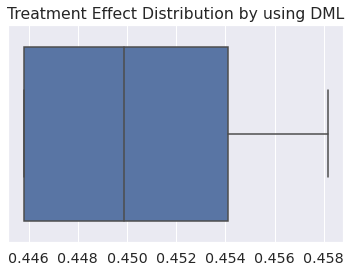

In [32]:
# check treatment effect distribution
sns.boxplot(x = te_pred).set_title("Treatment Effect Distribution by using DML");

The ATE is **positive**, we can interpret that as we develop the **Growth Mindset lecture or Seminar** on student, the achievement score should increase to **The Moon** like Elon Musk said about Dogecoin.

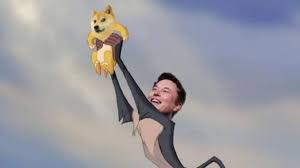

### **Meta-Learner**

**Define S-Learner**

In [40]:
# define gradient boosting regression as S-Learner model
overall_model = GradientBoostingRegressor(n_estimators=100, max_depth=10)
s_learner = SLearner(overall_model = overall_model)
# fit learner to data
s_learner.fit(Y = df[y], T = df[T], X = df[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [41]:
# Estimate treatment effects on test data
s_te = s_learner.effect(df[X])

In [42]:
# measure average treatment
np.mean(s_te)

**Interpretation**

Based on ***Meta-Learner*** Model, we got the same output of the effect of the intervention.

**Define X-Learner**

In [43]:
# Define X-learner
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Fit learner to data
X_learner.fit(Y = df[y], T = df[T], X = df[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [45]:
# Estimate treatment effects on test data
X_te = X_learner.effect(df[X])

# measure average treatment
np.mean(X_te)

**Define T-Learner**

In [46]:
# define gradient boosting regression as T-Learner model
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
T_learner = TLearner(models=models)
# fit learner to data
T_learner.fit(Y = df[y], T = df[T], X = df[X])

# Estimate treatment effects on test data
T_te = T_learner.effect(df[X])

# measure average treatment
np.mean(T_te)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


**Model Evaluation**

In [47]:
S_learner_df = pd.DataFrame({"model":"S-learner", "treatment_effect": s_te})
T_learner_df = pd.DataFrame({"model":"T-learner", "treatment_effect": T_te})
X_learner_df = pd.DataFrame({"model":"X-learner", "treatment_effect": X_te})

In [48]:
intervention_effect = pd.concat([S_learner_df, T_learner_df, X_learner_df])

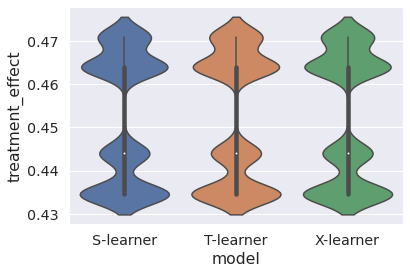

In [50]:
sns.violinplot(x = "model", y = "treatment_effect", data = intervention_effect);